# Fourier transformation

Editor: Weipeng Xu

Last modified: 08/07/2025

Reference:

1. https://github.com/tianjuxue/CIVL5390/tree/main/lectures

## Fourier transformation (FT)

### Forward transform

The Fourier transformation for a continuous time-domain signal $x(t)$ can be written as:
$$
X(\xi) = \int_{-\infty}^{\infty}x(t)e^{-j2\pi \xi t}dt
$$
where $X(\xi)$ is the complex-valued frequency-domain representation, and $\xi$ is the frequency variable (in Hertz). The complex (imaginary unit part $j$) exponential basis function $e^{-j2\pi \xi t}$ can be expanded using Euler‘s formula:
$$
e^{-j2\pi \xi t} = \cos(2\pi\xi t) - j\sin(2\pi\xi t)
$$
which satisfies the orthogonality property:
$$
\int_{-\infty}^{\infty}e^{-j2\pi \xi_1 t}\cdot e^{j2\pi \xi_2 t}dt = \delta(\xi_1-\xi_2)
$$
where $\delta(\xi)$ is the Dirac delta function satisfying：
$$
\int_{-\infty}^{\infty}\delta(t)dt=1
$$
The resulting $X(\xi)$ is a weighting coefficient for each frequency component.

### Inverse transform

We can also reconstructing the original time-domain signal $x(t)$ from the frequency-domain representation:
$$
x(t) = \int_{-\infty}^{\infty}X(\xi)e^{j2\pi\xi t}d\xi
$$ 

## Discrete fourier transform (DFT)

However, computers can only process discrete, finite-length signals. We need to discretize the continuous signal $x(t)$. With time interval $\Delta t_s$, we can obtain the sequence with $N$ samplings:
$$
x[n] = x(n\Delta t_s),\quad\,n=0,1,\cdots,N-1
$$
The continuous frequency is discretized with interval $\Delta \xi=\frac{1}{N\Delta t_s}$:
$$
\xi = k\Delta\xi = \frac{k}{N\Delta t_s} = \frac{kf_s}{N},\quad k=0,1,\cdots,N-1
$$
where $f_s = \frac{1}{\Delta t_s}$ is the sampling frequency. Then we can replace the contiunuous integration into a discrete summation:
$$
\int_{-\infty}^{\infty}dt\rightarrow \Delta t_s\sum_{n=0}^{N-1}
$$
we have:
$$
X[k] = \Delta t_s\sum_{n=0}^{N-1}x[n]e^{-j2\pi(\frac{kf_s}{N})(n\Delta t_s)} = \Delta t_s\sum_{n=0}^{N-1}x[n]e^{-j\frac{2\pi}{N}kn}
$$
which leads to the discrete fourier transform (DCT):
$$
X[k] = \sum_{n=0}^{N-1}x[n]e^{-j\frac{2\pi}{N}kn},\quad k=0,1,\cdots,N-1
$$
where $X[k]$ is the DCT coefficient at frequency bin $k$. The inverse DFT (IDFT) reconstructs $x[n]$ from $X[k]$:
$$
x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{j\frac{2\pi}{N}kn}
$$

## Fast fourier transformation (FFT)

The FFT is an efficient algorithm for computing the DFT that reduces the computational complexity from $\mathcal{O}(N^2)$ to $\mathcal{O}(N\log N)$. By exploiting symmetry and periodicity in the DFT, the FFT enables efficient computation of large transforms.

## Implementation

Maximum error: 4.1994605577390686e-13


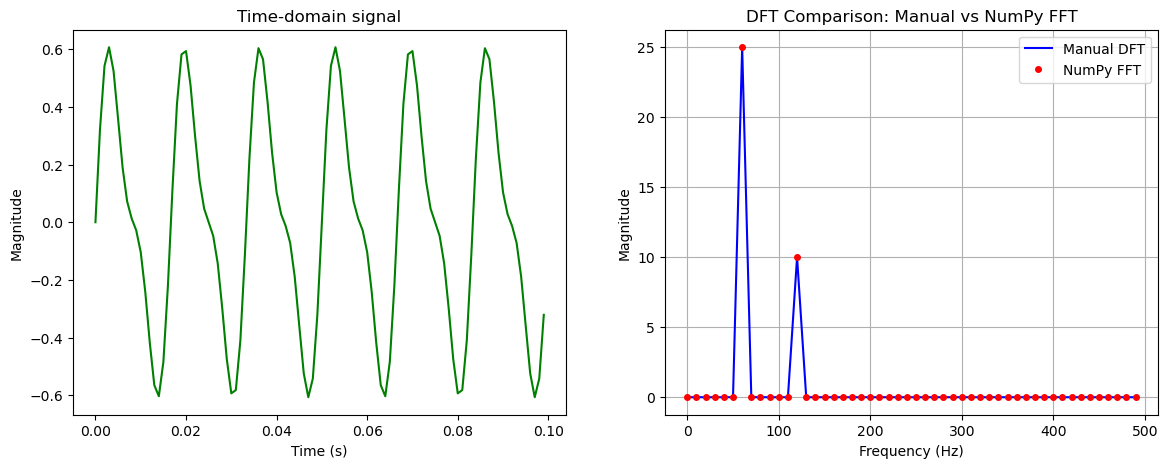

In [24]:
import numpy as onp
import matplotlib.pyplot as plt

# settings
N = 100
fs = 1000
ts = onp.arange(N) / fs
f = [60, 120]
def signal(t):
    return 0.5 * onp.sin(2 * onp.pi * f[0] * t) + 0.2 * onp.sin(2 * onp.pi * f[1] * t)
x = signal(ts)

# manual implementation
def manual_dft(x):
    N = len(x)
    X = onp.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * onp.exp(-2j * onp.pi * k * n /N)
    return X

# dft
X_manual = manual_dft(x)
X_onp = onp.fft.fft(x)
print(f'Maximum error: {onp.max(onp.abs(X_manual-X_onp))}')

# postprocessing
freqs = onp.fft.fftfreq(N, 1/fs)[:N//2] # X[k] = X[N-k]
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(ts, x, 'g')
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
plt.title("Time-domain signal")

plt.subplot(1,2,2)
plt.plot(freqs, onp.abs(X_manual[:len(freqs)]), 'b-', label="Manual DFT")
plt.plot(freqs, onp.abs(X_onp[:len(freqs)]), 'ro', label="NumPy FFT", markersize=4)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("DFT Comparison: Manual vs NumPy FFT")
plt.legend()
plt.grid()
plt.show()